In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [2]:
!pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 1.4 MB/s eta 0:00:00


In [4]:
# Load the dataset
data = pd.read_csv('youtube_videos_data.csv')

In [5]:
# Display first few rows of the dataset
print(data.head())

      Video ID                                              Title  \
0  xwIhGMV6myk  I Spent 1,000,000 ROBUX on KJ ADMIN MOVESET in...   
1  zvtfDqPcK2g  Cool items!😍New Gadgets, Smart Appliances, Hom...   
2  EYcYfFYJPZ0  This is the best potato salad I have ever had!...   
3  cGJBn-F2bVQ                           Spring roll peanut sauce   
4  JZWIT32NLGk  The Samoan Werewolf Jacob Fatu has been unleas...   

       Channel                Channel ID          Publish Date  \
0         STUD  UCGa_1uanLCDTDdQun1NhrLg  2024-07-13T11:30:22Z   
1  B8V9 Shorts  UC8RnkTFBnFYfBbL3iiygAag  2022-11-02T02:27:53Z   
2   SuperYummy  UCfx_nR5Dlg4s0qqzND5D16w  2022-02-16T13:58:33Z   
3  Jeanelleats  UCU03NklypYW1AAIoNE2Vh1g  2022-04-07T16:00:30Z   
4          WWE  UCJ5v_MCY6GNUBTO8-D3XoAg  2024-07-13T02:28:19Z   

                                         Description  \
0  Roblox the strongest battlegrounds funny momen...   
1                                                NaN   
2  MAKINGS:\n4 potat

In [6]:
# Check for missing values
print(data.isnull().sum())

Video ID                   0
Title                      0
Channel                    0
Channel ID                 0
Publish Date               0
Description               17
Tags                      27
Category                   0
Duration                   0
Views                      0
Likes                      4
Dislikes                  65
Comments                   3
Favorites                  0
Video Link                 0
Definition                 0
Caption                    0
Licensed Content           0
Projection                 0
Privacy Status             0
Live Streaming Details     0
dtype: int64


count    6.500000e+01
mean     3.355258e+07
std      7.424483e+07
min      1.074970e+05
25%      2.471140e+05
50%      6.092250e+05
75%      6.719768e+06
max      3.287638e+08
Name: Views, dtype: float64


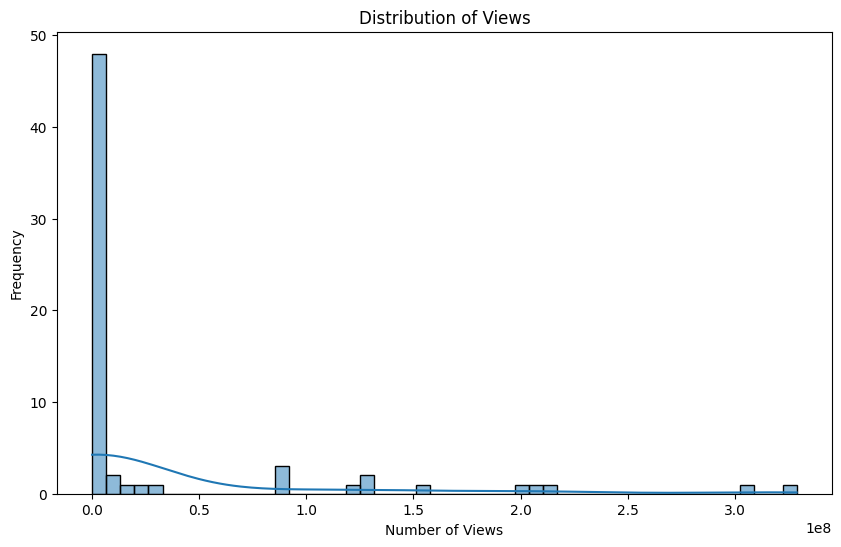

Percentage of videos with high views: 49.23076923076923%


In [8]:
# Number of views

print(data['Views'].describe())

# Plot views distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Views'], bins=50, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

# Check if most videos have a large number of views
high_views = data[data['Views'] > data['Views'].median()]
print(f"Percentage of videos with high views: {len(high_views) / len(data) * 100}%")

count    6.100000e+01
mean     6.025373e+05
std      1.289974e+06
min      6.000000e+00
25%      4.960000e+03
50%      1.910200e+04
75%      2.272360e+05
max      6.643739e+06
Name: Likes, dtype: float64


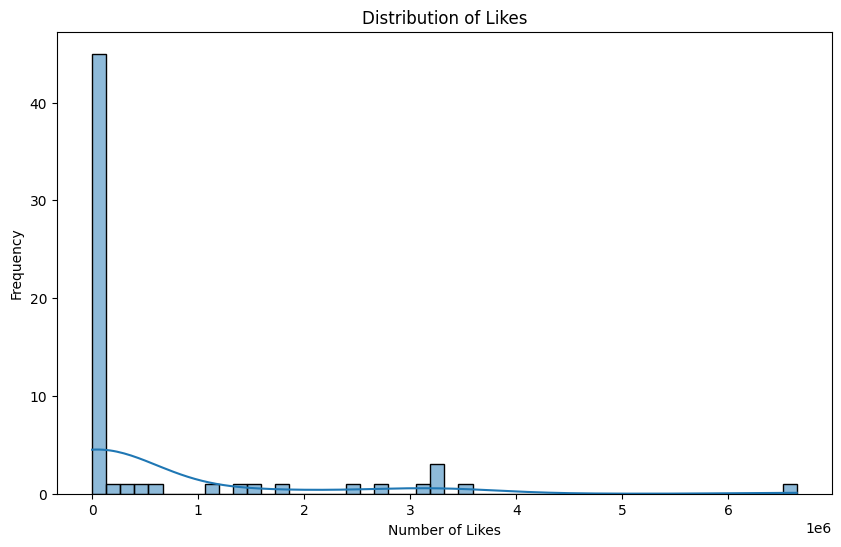

Percentage of videos with high likes: 46.15384615384615%


In [10]:
# likes.

print(data['Likes'].describe())

# Plot likes distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Likes'], bins=50, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

# Check if most videos have a large number of likes
high_likes = data[data['Likes'] > data['Likes'].median()]
print(f"Percentage of videos with high likes: {len(high_likes) / len(data) * 100}%")

count       62.000000
mean      1150.709677
std       2770.551649
min          0.000000
25%        108.000000
50%        363.500000
75%        724.250000
max      17554.000000
Name: Comments, dtype: float64


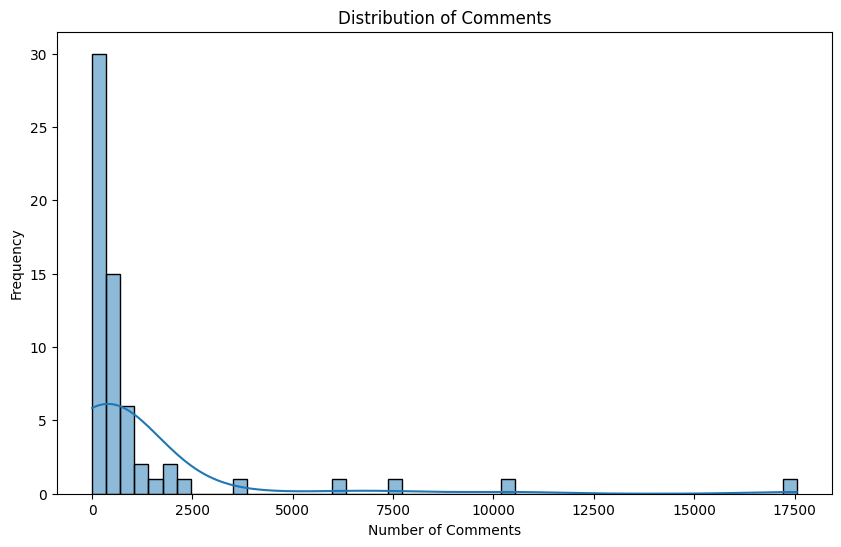

Percentage of videos with high comments: 47.69230769230769%


In [12]:
#comment analysis.

# Comments statistics
print(data['Comments'].describe())

# Plot comments distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Comments'], bins=50, kde=True)
plt.title('Distribution of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

# Check if most videos have a large number of comments
high_comments = data[data['Comments'] > data['Comments'].median()]
print(f"Percentage of videos with high comments: {len(high_comments) / len(data) * 100}%")

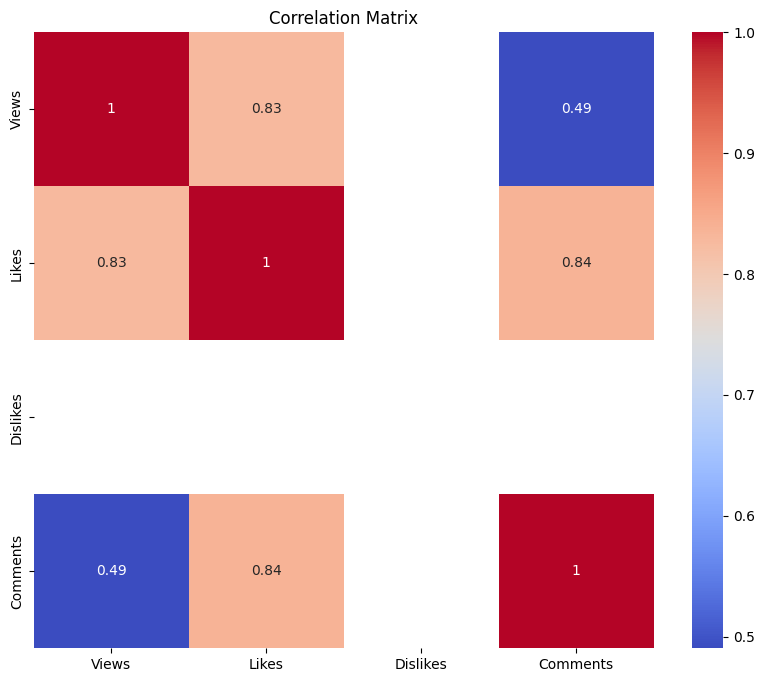

In [13]:
#Correlation Analysis

# Correlation matrix
corr_matrix = data[['Views', 'Likes', 'Dislikes', 'Comments', 'Duration']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Percentage of videos with fully-capitalized words in titles: 36.92307692307693%


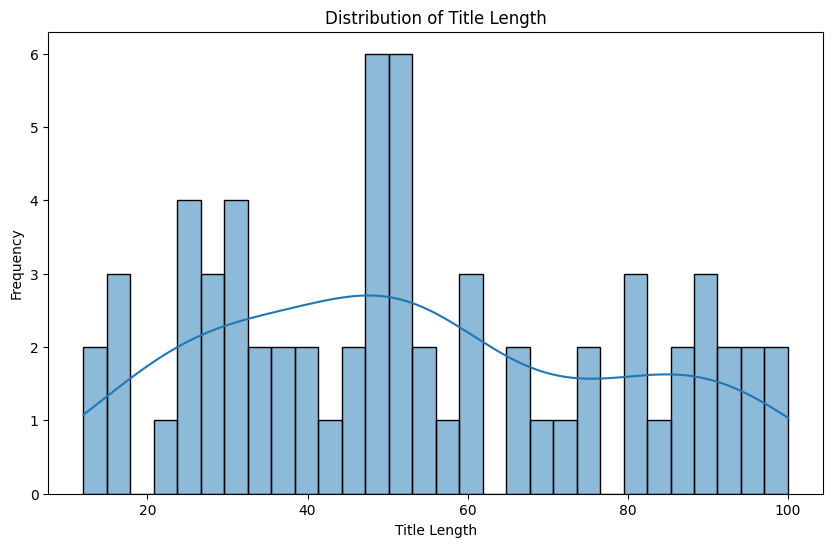

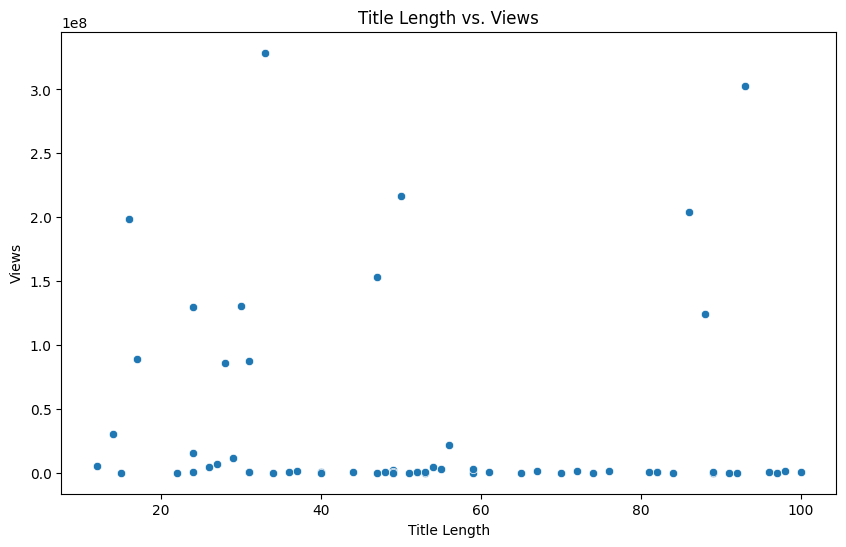

In [14]:
#Title Analysis

# Fully-capitalized words in titles
fully_capitalized_titles = data[data['Title'].apply(lambda x: any(word.isupper() for word in x.split()))]
print(f"Percentage of videos with fully-capitalized words in titles: {len(fully_capitalized_titles) / len(data) * 100}%")

# Title length analysis
data['Title Length'] = data['Title'].apply(len)

# Plot title length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Title Length'], bins=30, kde=True)
plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# Correlation between title length and views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Title Length', y='Views')
plt.title('Title Length vs. Views')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.show()

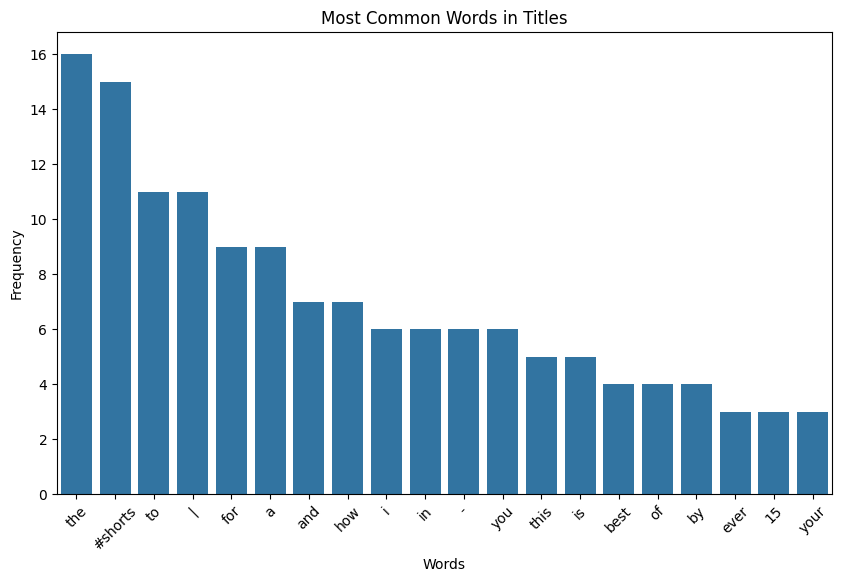

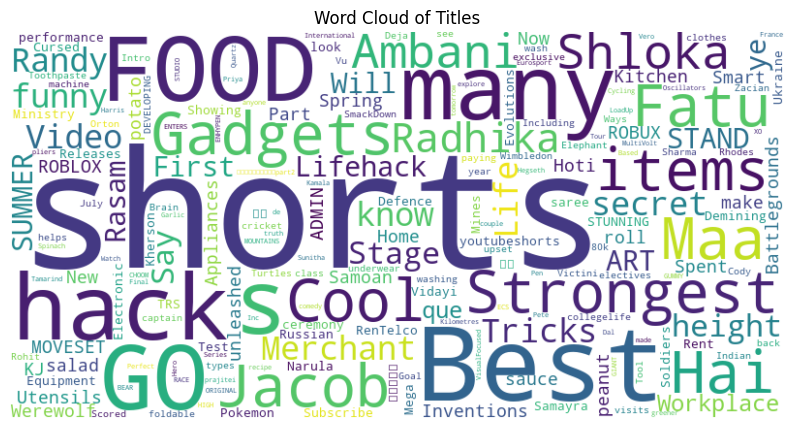

In [15]:
#Common words in title

# Most common words in titles
all_words = ' '.join(data['Title']).lower().split()
common_words = Counter(all_words).most_common(20)

# Plot common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Most Common Words in Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Word cloud of titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47116 (\N{HANGUL SYLLABLE REN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54609 (\N{HANGUL SYLLABLE PING}) missing from current font.
  fig.canvas.pri

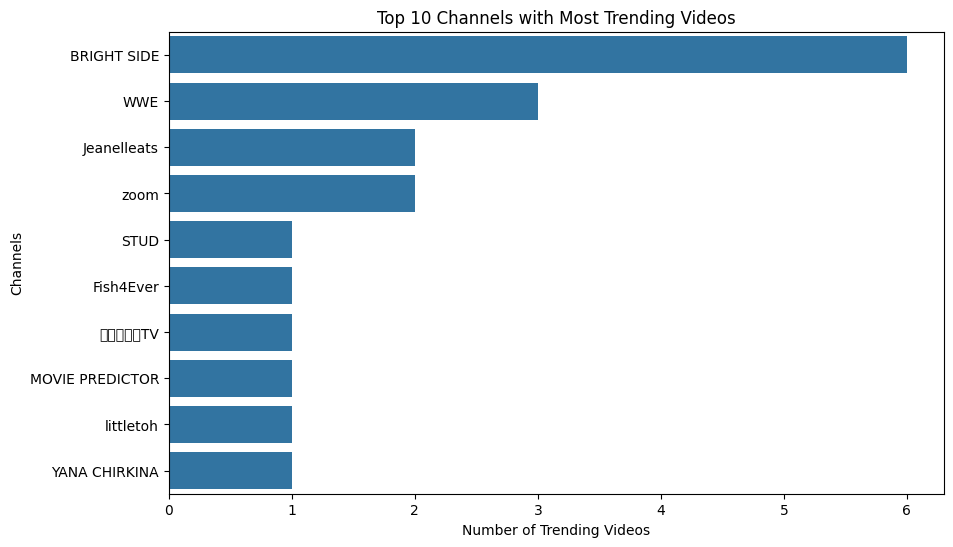

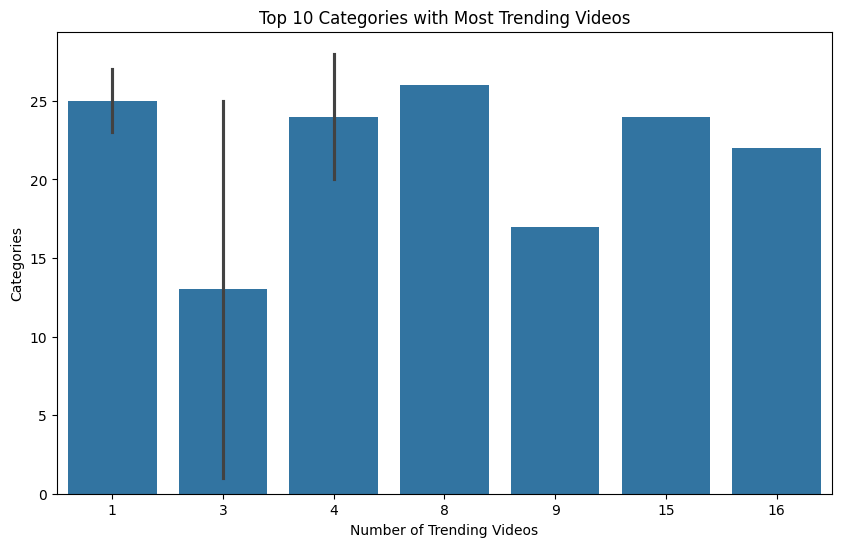

In [16]:
#Channel and category analysis

# Channels with the largest number of trending videos
top_channels = data['Channel'].value_counts().head(10)

# Plot top channels
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels.values, y=top_channels.index)
plt.title('Top 10 Channels with Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channels')
plt.show()

# Categories with the largest number of trending videos
top_categories = data['Category'].value_counts().head(10)

# Plot top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categories with Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Categories')
plt.show()

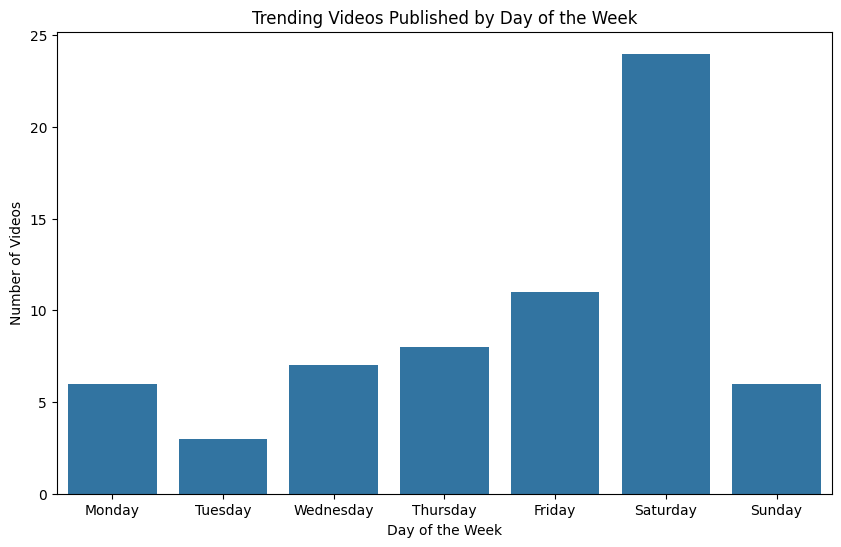

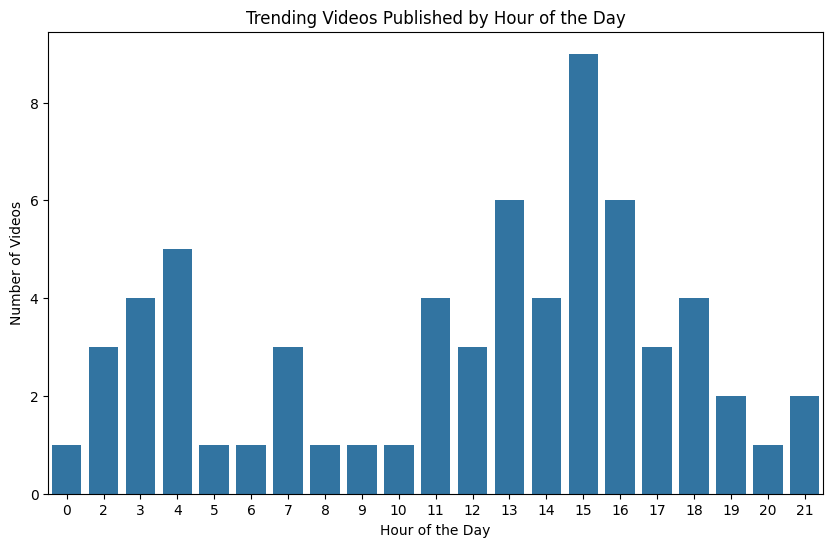

In [17]:
#Publication time analysis

# Convert Publish Date to datetime
data['Publish Date'] = pd.to_datetime(data['Publish Date'])

# Extract day of the week and hour
data['Day of Week'] = data['Publish Date'].dt.day_name()
data['Hour'] = data['Publish Date'].dt.hour

# Plot publication days
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trending Videos Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.show()

# Plot publication hours
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data)
plt.title('Trending Videos Published by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.show()

## Step 1: Load the Data

#### Assuming you have the data saved in a CSV file, you can load it using pandas:

In [18]:
import pandas as pd

# Load the data
df = pd.read_csv('youtube_videos_data.csv')

# Display basic information about the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Video ID                65 non-null     object 
 1   Title                   65 non-null     object 
 2   Channel                 65 non-null     object 
 3   Channel ID              65 non-null     object 
 4   Publish Date            65 non-null     object 
 5   Description             48 non-null     object 
 6   Tags                    38 non-null     object 
 7   Category                65 non-null     int64  
 8   Duration                65 non-null     object 
 9   Views                   65 non-null     int64  
 10  Likes                   61 non-null     float64
 11  Dislikes                0 non-null      float64
 12  Comments                62 non-null     float64
 13  Favorites               65 non-null     int64  
 14  Video Link              65 non-null     obje

## Step 2: Explore the Data

#### Perform exploratory data analysis to understand the distribution and relationships between parameters.

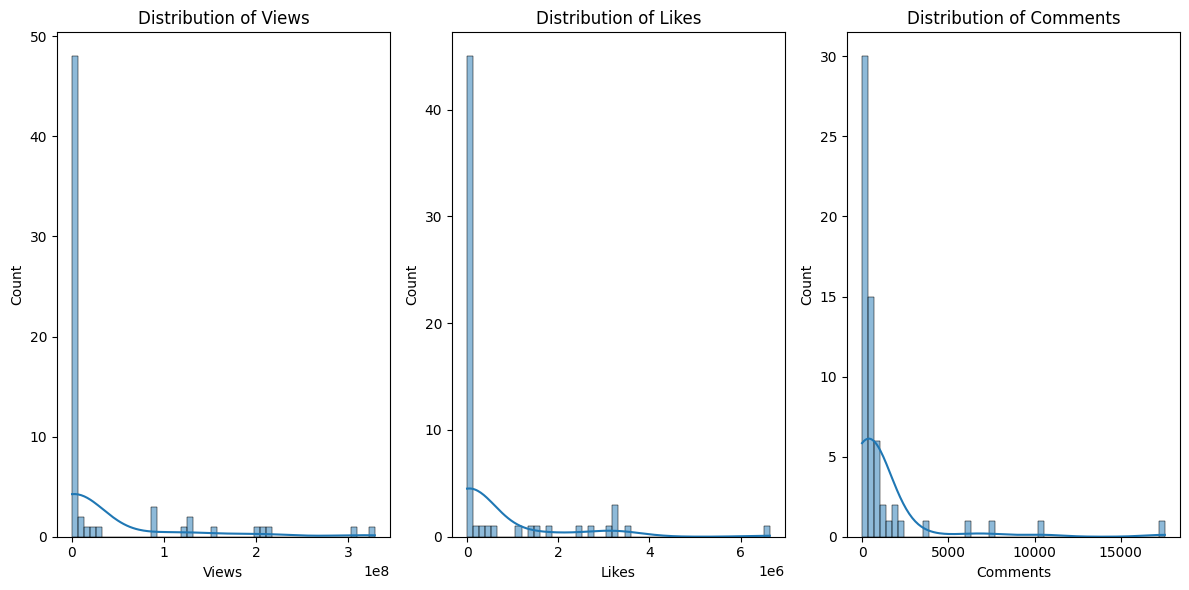

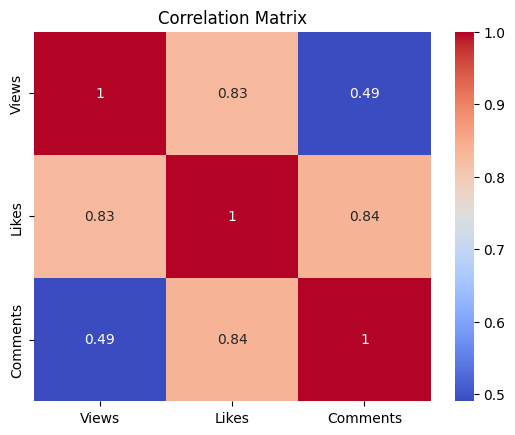

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of views, likes, and comments
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Views'], bins=50, kde=True)
plt.title('Distribution of Views')

plt.subplot(1, 3, 2)
sns.histplot(df['Likes'], bins=50, kde=True)
plt.title('Distribution of Likes')

plt.subplot(1, 3, 3)
sns.histplot(df['Comments'], bins=50, kde=True)
plt.title('Distribution of Comments')

plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = df[['Views', 'Likes', 'Comments']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Step 3: Set Thresholds

#### Based on the distribution plots and correlation matrix, you can set thresholds for views, likes, and comments. For example, you might consider the top 10% of videos in terms of views as trending.

In [20]:
# Calculate the 90th percentile for views, likes, and comments
views_threshold = df['Views'].quantile(0.90)
likes_threshold = df['Likes'].quantile(0.90)
comments_threshold = df['Comments'].quantile(0.90)

print(f"Views Threshold: {views_threshold}")
print(f"Likes Threshold: {likes_threshold}")
print(f"Comments Threshold: {comments_threshold}")

# Filter trending videos
trending_videos = df[(df['Views'] >= views_threshold) &
                     (df['Likes'] >= likes_threshold) &
                     (df['Comments'] >= comments_threshold)]

print(f"Number of Trending Videos: {len(trending_videos)}")

Views Threshold: 130114221.4
Likes Threshold: 2671431.0
Comments Threshold: 1958.0999999999997
Number of Trending Videos: 2


## Additional Analysis

#### You can perform additional analysis to answer the specific questions you mentioned earlier.

In [21]:
# Fully Capitalized Words in Titles

# Check for fully capitalized words in titles
df['Fully Capitalized'] = df['Title'].apply(lambda x: any(word.isupper() for word in x.split()))

# Number of trending videos with fully capitalized words
num_capitalized_trending = df[df['Fully Capitalized']].shape[0]
print(f"Number of Trending Videos with Fully Capitalized Words: {num_capitalized_trending}")

Number of Trending Videos with Fully Capitalized Words: 24


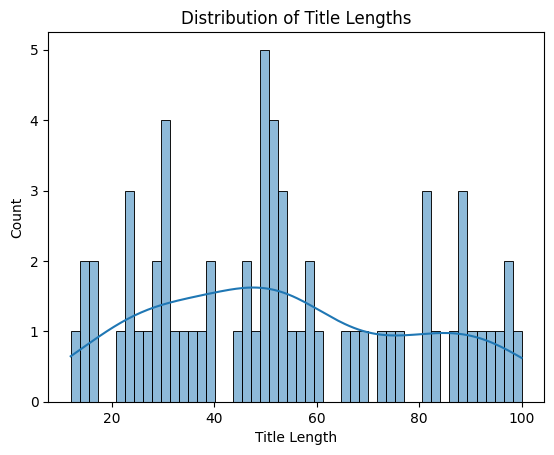

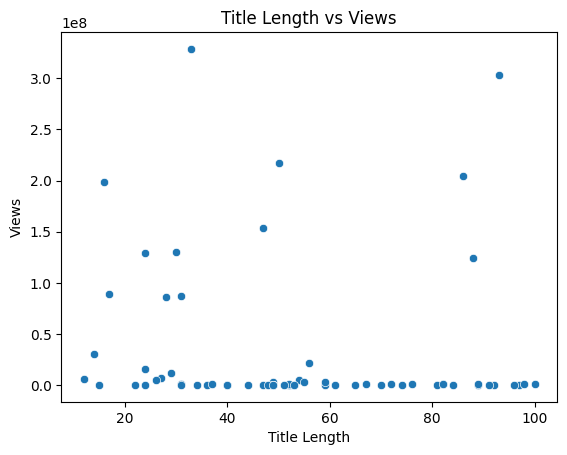

In [22]:
# Title Length

# Calculate title length
df['Title Length'] = df['Title'].apply(len)

# Distribution of title lengths
sns.histplot(df['Title Length'], bins=50, kde=True)
plt.title('Distribution of Title Lengths')
plt.show()

# Correlation with views
sns.scatterplot(data=df, x='Title Length', y='Views')
plt.title('Title Length vs Views')
plt.show()

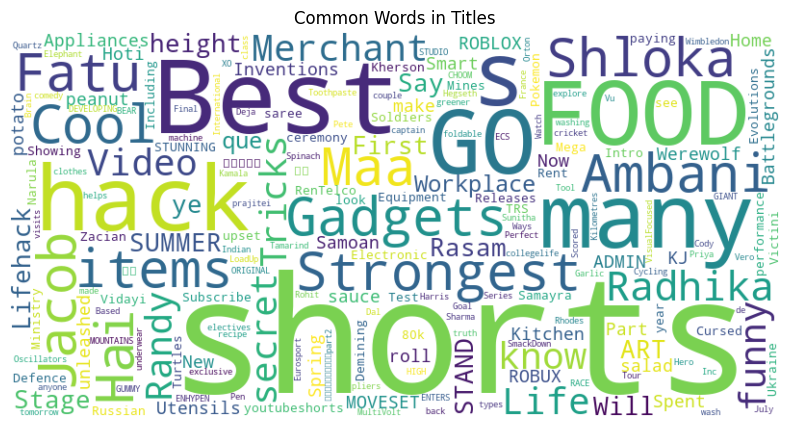

[('#shorts', 15), ('|', 11), ('the', 10), ('a', 8), ('for', 7), ('I', 6), ('The', 6), ('to', 6), ('-', 6), ('You', 6), ('in', 5), ('is', 4), ('and', 4), ('How', 4), ('by', 4), ('Best', 3), ('15', 3), ('Your', 3), ('of', 3), ('To', 3)]


In [23]:
# Common Words in Titles

from collections import Counter
from wordcloud import WordCloud

# Generate a word cloud of common words in titles
all_titles = ' '.join(df['Title'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Titles')
plt.show()

# Most common words
word_counts = Counter(all_titles.split())
print(word_counts.most_common(20))

## Analysis Code

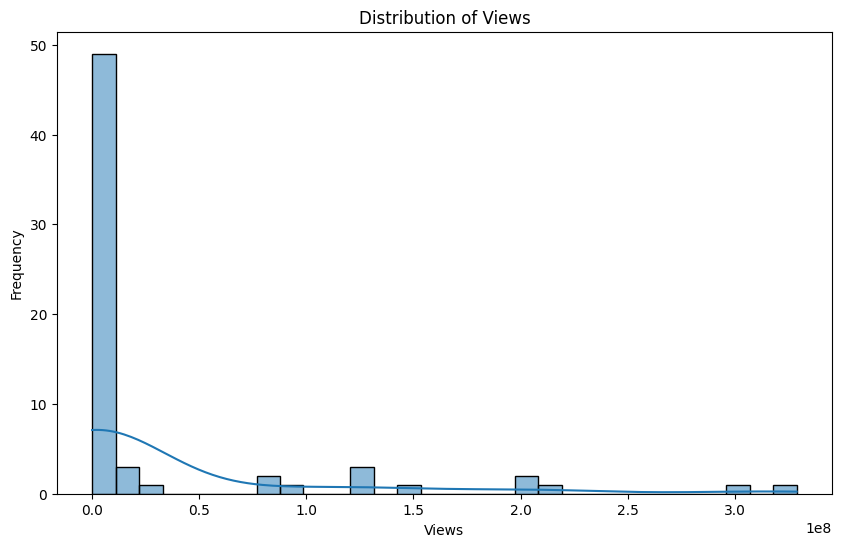

Percentage of videos with high views: 10.77%


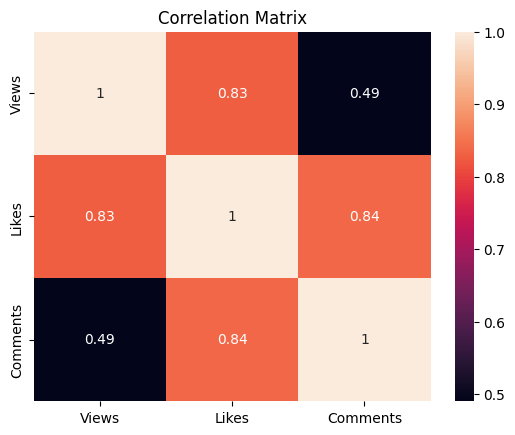

Number of videos with fully-capitalized words in title: 24


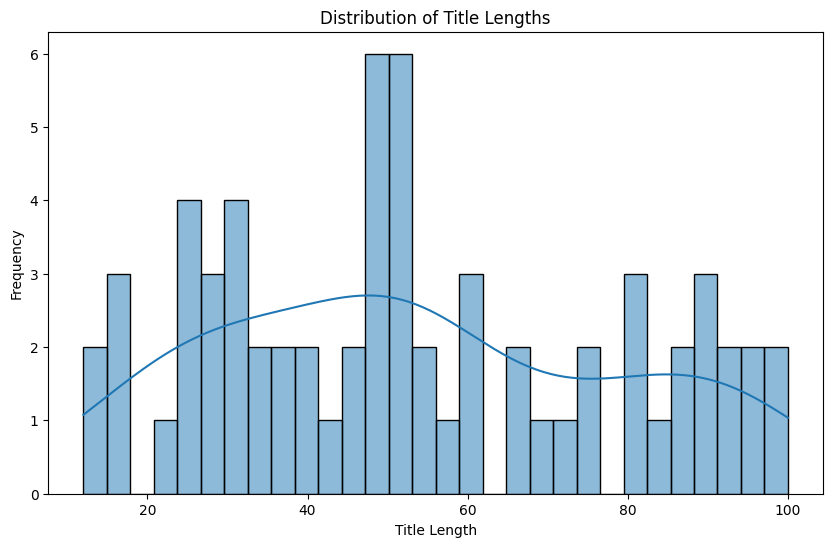

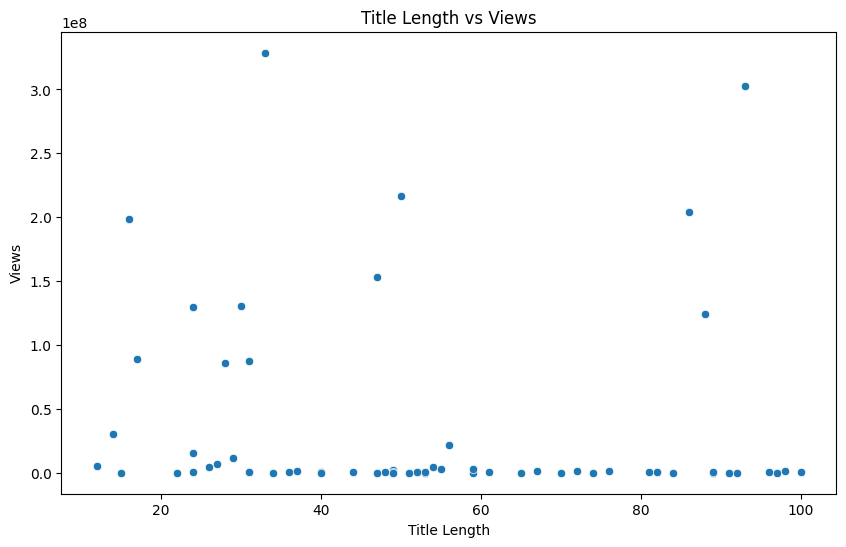

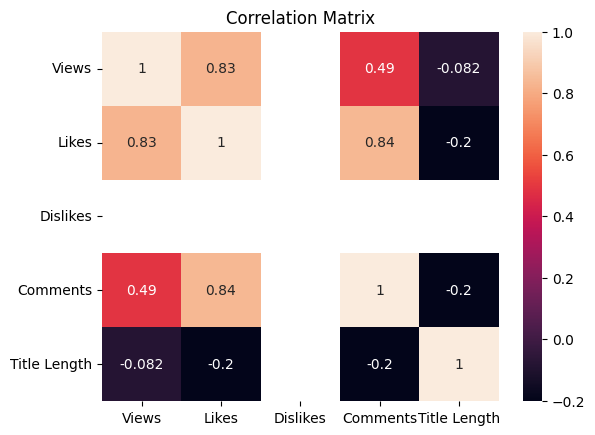

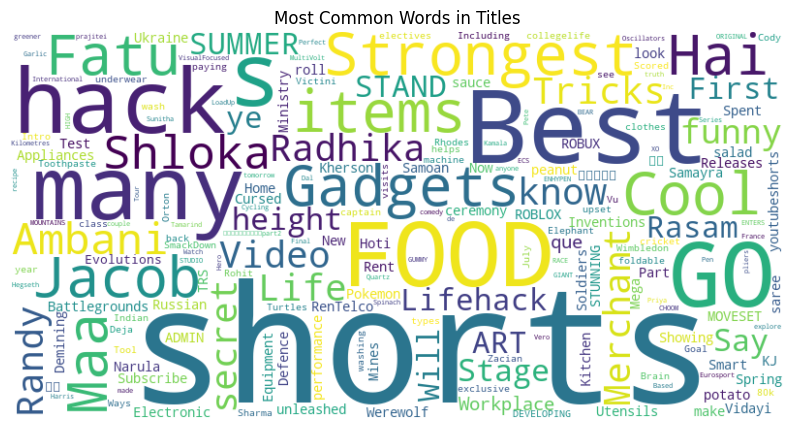

C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47116 (\N{HANGUL SYLLABLE REN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Shantanu Mishra\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54609 (\N{HANGUL SYLLABLE PING}) missing from current font.
  fig.canvas.pri

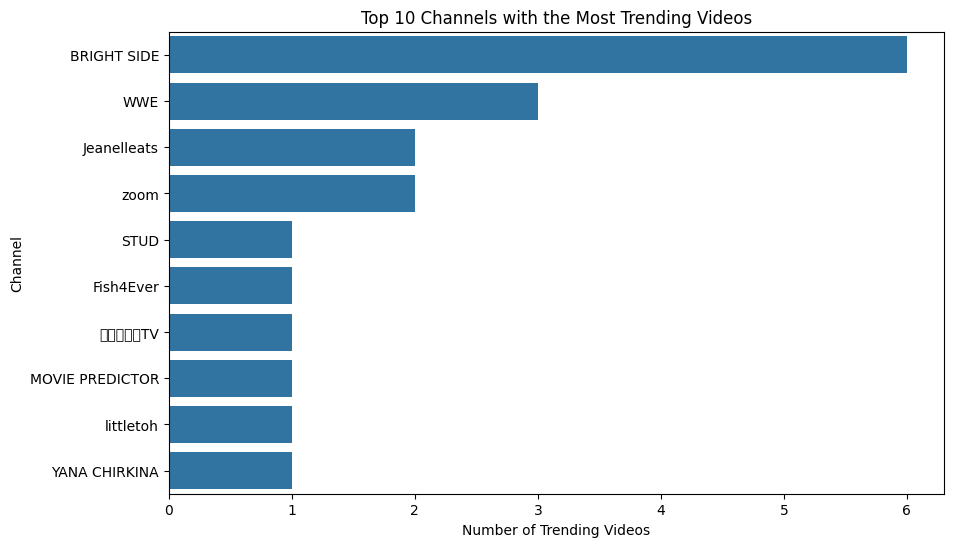

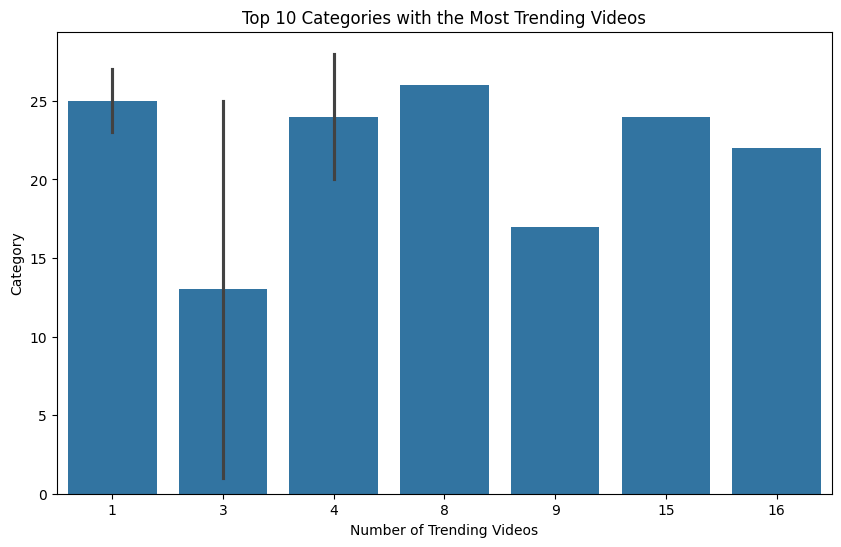

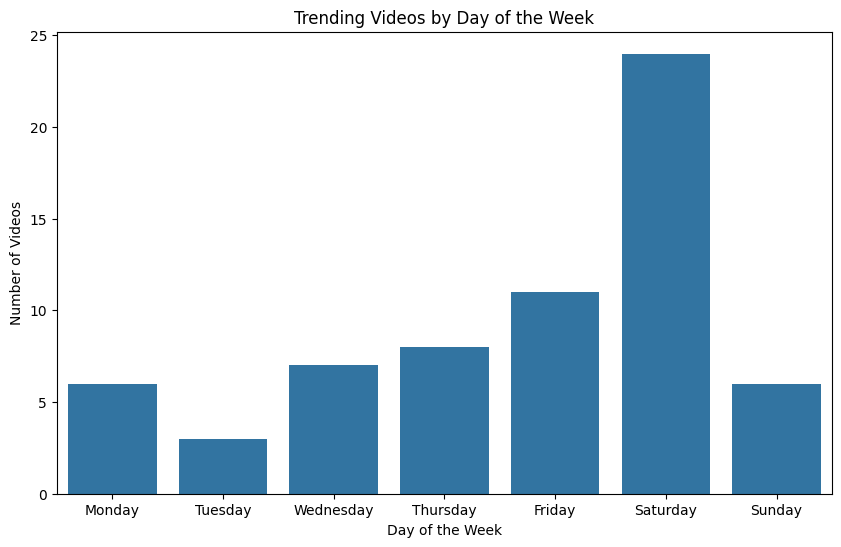

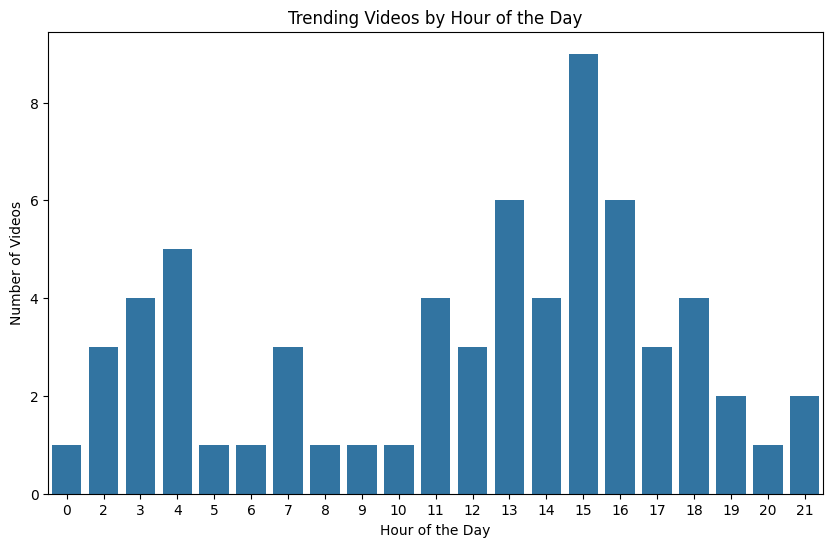

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Load data
df = pd.read_csv('youtube_videos_data.csv')

# Convert dates
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# a. Setting Thresholds
threshold_views = df['Views'].quantile(0.9)
threshold_likes = df['Likes'].quantile(0.9)

# b. Detailed Analysis

# 1. Distribution of views
plt.figure(figsize=(10, 6))
sns.histplot(df['Views'], bins=30, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# 2. Percentage of videos with a large number of views
high_view_videos = df[df['Views'] > threshold_views]
percentage_high_views = len(high_view_videos) / len(df) * 100
print(f"Percentage of videos with high views: {percentage_high_views:.2f}%")

# 3. Correlation of views with likes and comments
correlation_matrix = df[['Views', 'Likes', 'Comments']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# 4. Fully-capitalized words in titles
fully_capitalized_titles = df['Title'].apply(lambda x: any(word.isupper() for word in x.split()))
num_fully_capitalized = fully_capitalized_titles.sum()
print(f"Number of videos with fully-capitalized words in title: {num_fully_capitalized}")

# 5. Length of titles
df['Title Length'] = df['Title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Title Length'], bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# 6. Correlation of title length with views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Title Length', y='Views', data=df)
plt.title('Title Length vs Views')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.show()

# 7. Correlation matrix for various attributes
attributes = ['Views', 'Likes', 'Dislikes', 'Comments', 'Title Length']
correlation_matrix = df[attributes].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# 8. Most common words in titles
all_titles = ' '.join(df['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()

# 9. Channels with the largest number of trending videos
channel_counts = df['Channel'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.values, y=channel_counts.index)
plt.title('Top 10 Channels with the Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel')
plt.show()

# 10. Video categories with the largest number of trending videos
category_counts = df['Category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Categories with the Most Trending Videos')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Category')
plt.show()

# 11. When were trending videos published?
df['Day of Week'] = df['Publish Date'].dt.day_name()
df['Hour of Day'] = df['Publish Date'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trending Videos by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour of Day', data=df)
plt.title('Trending Videos by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.show()